In [11]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!

In [12]:
symbol ="AAPL TSLA SPY AMZN BABA GOOGL MSFT NFLX PYPL COST AAL"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2020-05-01",end="2021-02-06")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-04-30,18382.0,71.932410,73.066124,71.533010,72.885025
2020-05-01,18383.0,71.012053,74.175035,70.912823,71.711632
2020-05-04,18386.0,71.736440,72.857745,71.029419,72.726265
2020-05-05,18387.0,73.197610,74.671188,73.048762,73.817802
2020-05-06,18388.0,74.537215,75.226869,74.142774,74.579391
...,...,...,...,...,...
2021-02-01,18659.0,133.550432,135.178005,130.734633,133.939850
2021-02-02,18660.0,135.527476,136.106612,134.409152,134.788589
2021-02-03,18661.0,135.557435,135.567429,133.410649,133.740158


In [13]:

for i in range(len(num_name)):
    df[i]['12EMA'] = talib.EMA(df[i]['Close'], timeperiod = 12)
    df[i]['26EMA'] = talib.EMA(df[i]['Close'], timeperiod = 26)
    df[i]["MACDLine"]= df[i]['12EMA']-df[i]['26EMA']
    df[i]['SignalLine'] = talib.EMA(df[i]["MACDLine"], timeperiod = 9)
    df[i]['Histogram'] = df[i]["MACDLine"]- df[i]['SignalLine']
    df[i]['Signal'] = 0.0
    df[i]['Signal'] = np.where(df[i]['MACDLine'] > df[i]['SignalLine'], 1.0, 0.0)
    df[i]['Position'] = df[i]['Signal'].diff()

len(df)

11

In [14]:
df[5]
# df[0][['MACDLine','SignalLine']].plot(figsize=(12,10))
# plt.show()
df[0]["MACDLine"]

Date
2020-04-30         NaN
2020-05-01         NaN
2020-05-04         NaN
2020-05-05         NaN
2020-05-06         NaN
                ...   
2021-02-01    2.562363
2021-02-02    2.335278
2021-02-03    2.047114
2021-02-04    2.072817
2021-02-05    2.035430
Name: MACDLine, Length: 195, dtype: float64

In [15]:
len(data.index)

195

In [16]:
data.index

DatetimeIndex(['2020-04-30', '2020-05-01', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13',
               ...
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-02-01', '2021-02-02', '2021-02-03',
               '2021-02-04', '2021-02-05'],
              dtype='datetime64[ns]', name='Date', length=195, freq=None)

In [19]:
def plotMACD(i):
    
  fig = plt.figure(figsize=(12,8))
  gs = gridspec.GridSpec(2, 1, height_ratios = [2,1]) 
  ax_stock= plt.subplot(gs[0])    
  plt.title(num_name[i])

  candlestick_ohlc(ax_stock,df[i].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

 # plot ‘buy’ signals
  plt.plot(df[i][df[i]['Position'] == 1].index, 
         df[i]['Close'][df[i]['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
  plt.plot(df[i][df[i]['Position'] == -1].index, 
         df[i]['Close'][df[i]['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
    
    
  ax_MACD= plt.subplot(gs[1],sharex=ax_stock)
 
  ax_MACD.plot(data.index,df[i]["MACDLine"] )
  ax_MACD.plot(data.index,df[i]["SignalLine"] )
  ax_MACD.plot(data.index,df[i]['Histogram'])
  plt.fill_between(data.index,df[i]['Histogram']) # sns.kdeplot(df[0]['Close'], shade=True) not fully apllicable 
  
  legend_labels= ["MACDLine", "SignalLine"]
  ax_MACD.legend(legend_labels,loc = 2)


    # plot ‘buy’ signals
  plt.plot(df[i][df[i]['Position'] == 1].index, 
         df[i]['MACDLine'][df[i]['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
  plt.plot(df[i][df[i]['Position'] == -1].index, 
         df[i]['MACDLine'][df[i]['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
    

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_MACD.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_stock.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  ax_stock.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  ax_MACD.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_stock.set_ylabel("Price ($)")
  ax_MACD.set_ylabel("MACD")


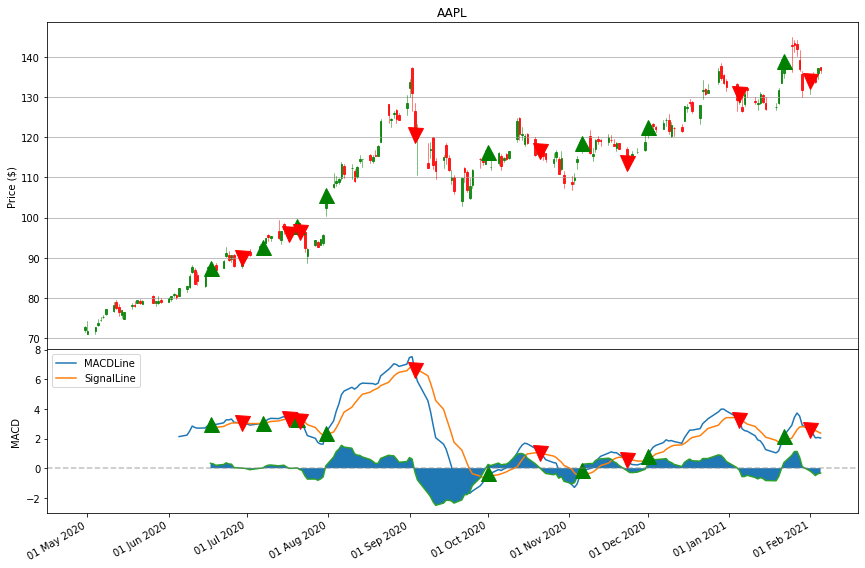

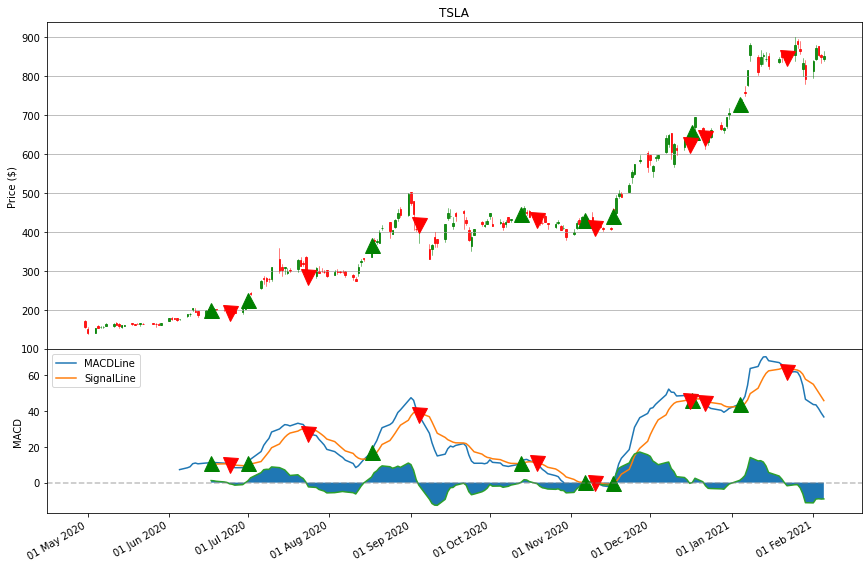

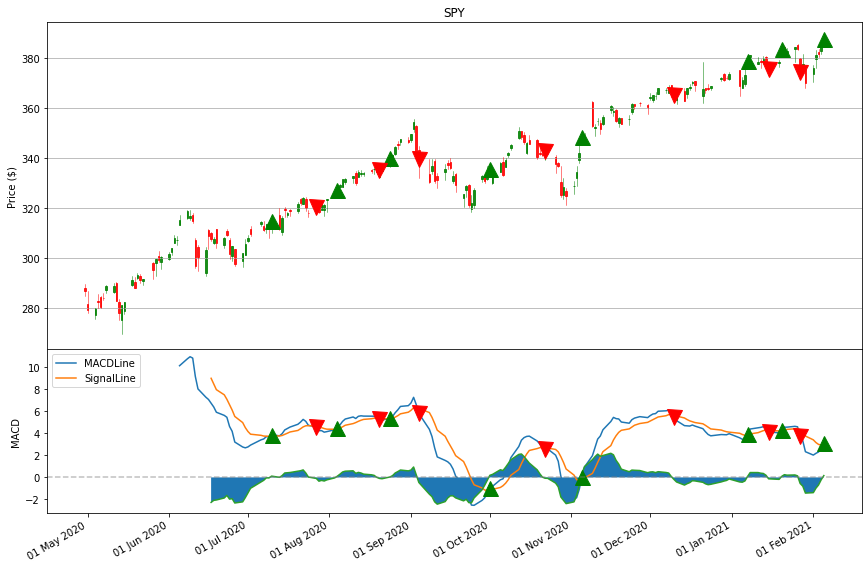

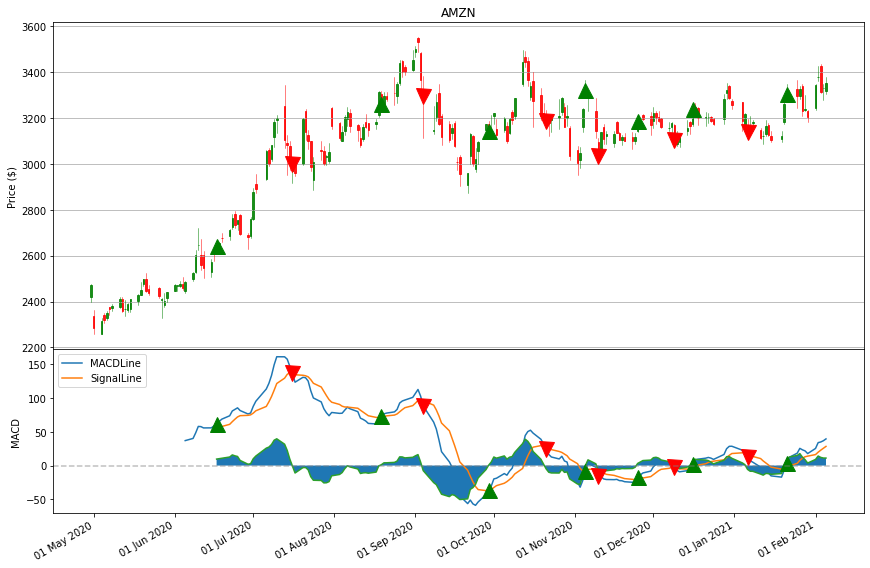

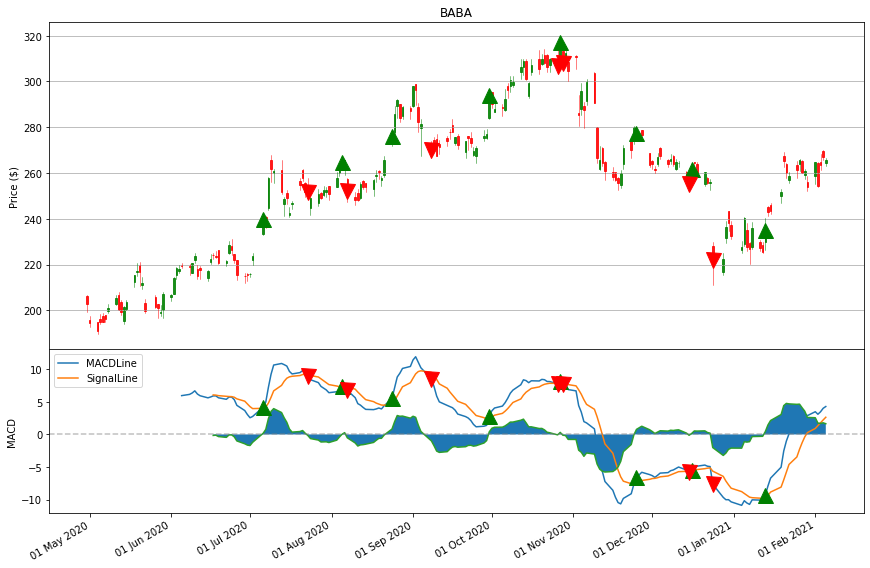

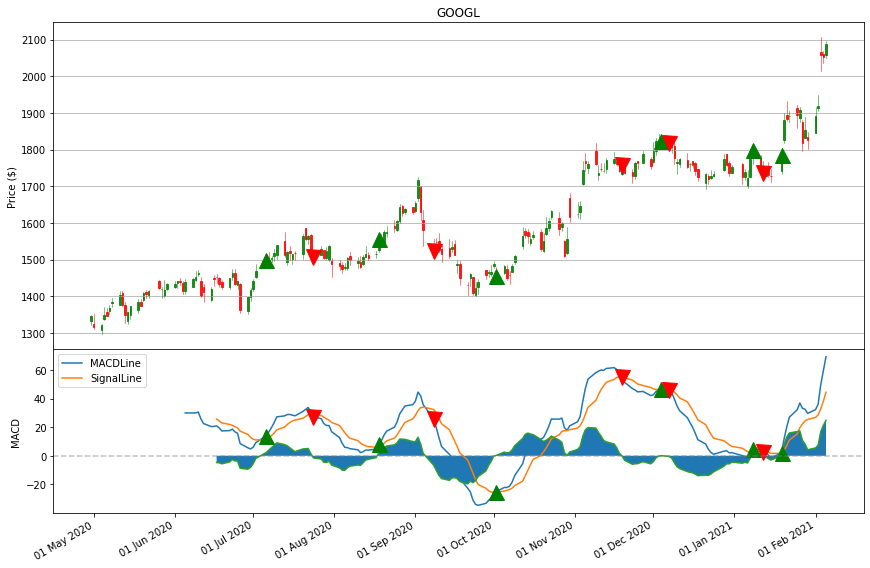

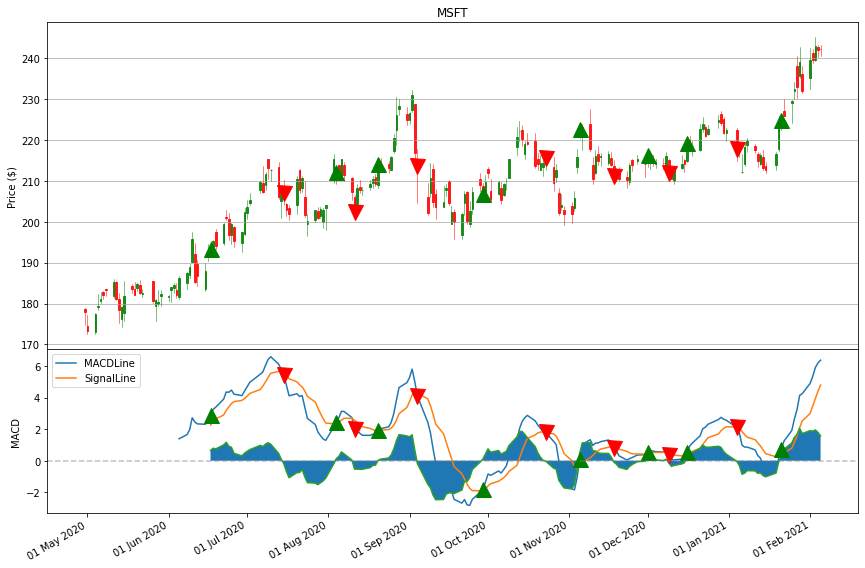

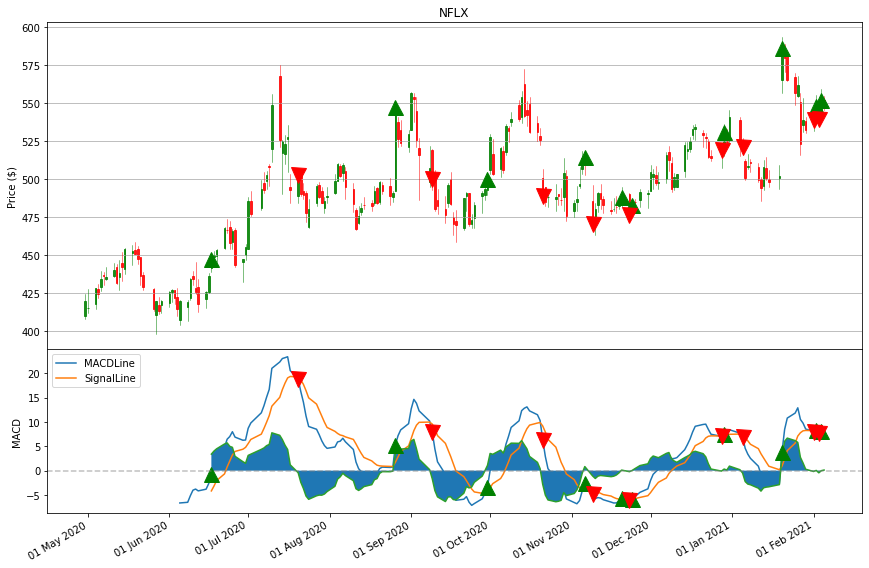

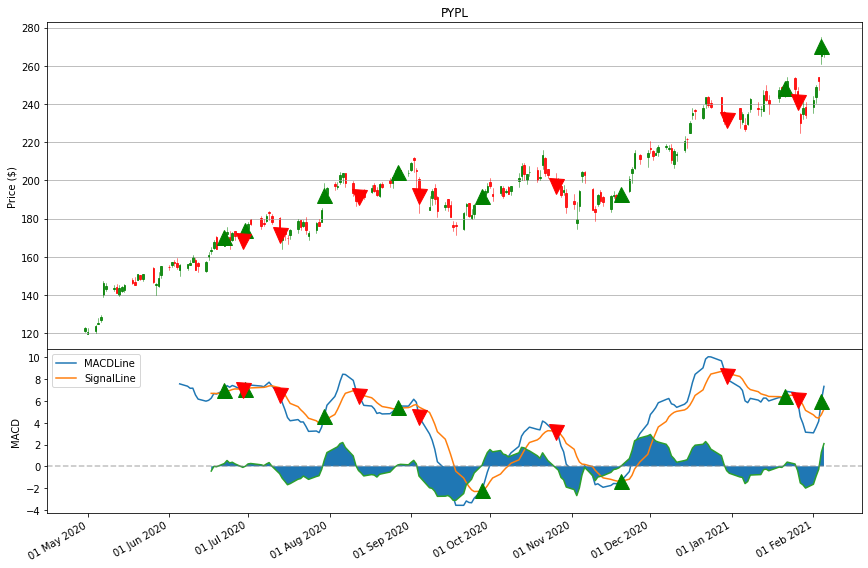

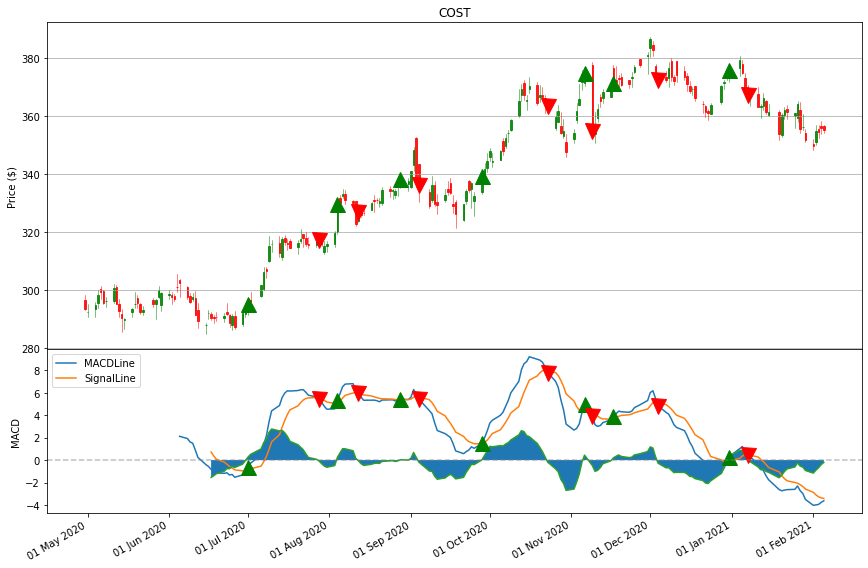

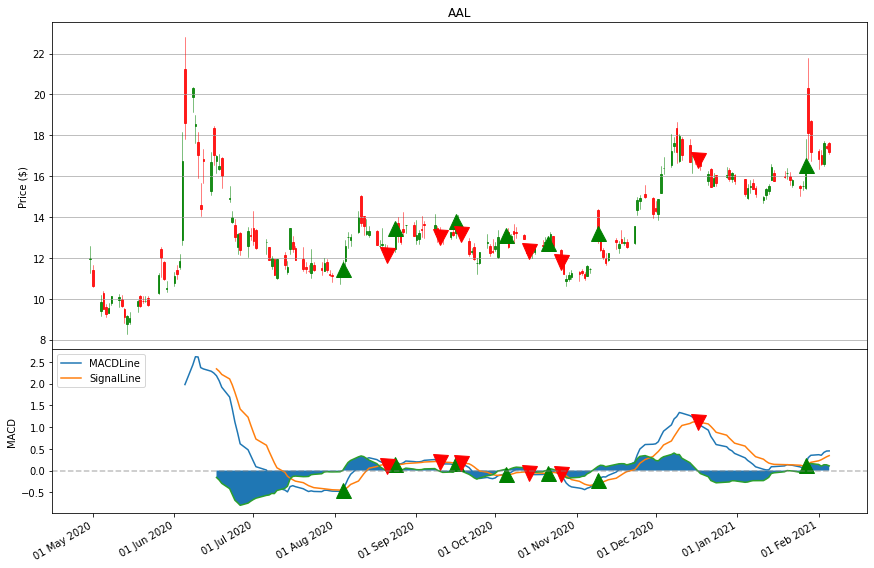

In [20]:
for i in range(len(num_name)):
        plotMACD(i)